In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
print("Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Shape: (7043, 21)

First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**UNDERSTANDING DATASET**

In [4]:
print("Column names and data types:")
print(df.dtypes)


Column names and data types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [5]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
print("\nChurn distribution:")
print(df['Churn'].value_counts())


Churn distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


DATA CLEANING

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df.dropna(subset=['TotalCharges'], inplace=True)

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df.drop(columns=['customerID'], inplace=True)

print("Cleaned shape:", df.shape)
print("\nChurn column now looks like:")
print(df['Churn'].value_counts())

Cleaned shape: (7032, 20)

Churn column now looks like:
Churn
0    5163
1    1869
Name: count, dtype: int64


Exploratory Data Analysis

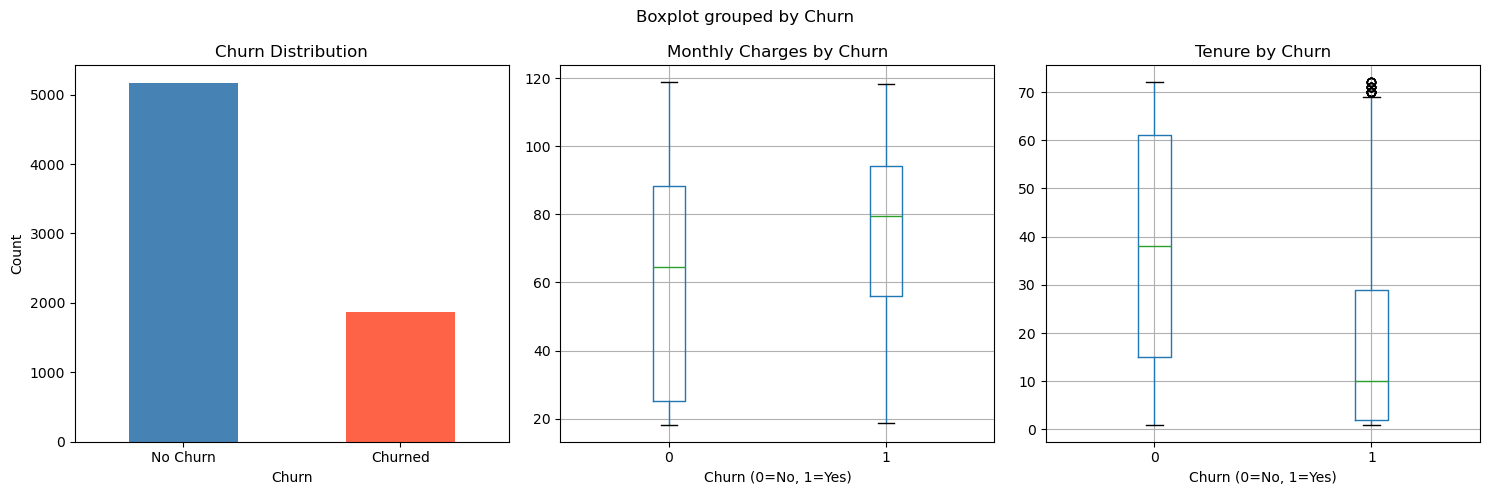

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Chart 1: Churn distribution
df['Churn'].value_counts().plot(kind='bar', ax=axes[0], color=['steelblue', 'tomato'])
axes[0].set_title('Churn Distribution')
axes[0].set_xticklabels(['No Churn', 'Churned'], rotation=0)
axes[0].set_ylabel('Count')

# Chart 2: Monthly Charges vs Churn
df.boxplot(column='MonthlyCharges', by='Churn', ax=axes[1])
axes[1].set_title('Monthly Charges by Churn')
axes[1].set_xlabel('Churn (0=No, 1=Yes)')

# Chart 3: Tenure vs Churn
df.boxplot(column='tenure', by='Churn', ax=axes[2])
axes[2].set_title('Tenure by Churn')
axes[2].set_xlabel('Churn (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

FEATURE ENGINGERING

In [15]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Shape after encoding:", df_encoded.shape)
print("\nFirst 3 rows:")
df_encoded.head(3)


Shape after encoding: (7032, 31)

First 3 rows:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True


In [16]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# Split - 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("\nChurn rate in training set:", round(y_train.mean() * 100, 2), "%")
print("Churn rate in test set:", round(y_test.mean() * 100, 2), "%")

Training set size: (5625, 30)
Test set size: (1407, 30)

Churn rate in training set: 26.58 %
Churn rate in test set: 26.58 %


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Model 1: Logistic Regression with class_weight='balanced' (cost-sensitive learning)
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Model 2: Random Forest with class_weight='balanced' (cost-sensitive learning)
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("=== Logistic Regression ===")
print(classification_report(y_test, lr_preds))
print("AUC Score:", round(roc_auc_score(y_test, lr_model.predict_proba(X_test)[:,1]), 3))

print("\n=== Random Forest ===")
print(classification_report(y_test, rf_preds))
print("AUC Score:", round(roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]), 3))

c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.74      1407

AUC Score: 0.836

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

AUC Score: 0.818


Fix convergence + Scale features for better Logistic Regression

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Build a pipeline that scales then fits
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

lr_pipeline.fit(X_train, y_train)
lr_preds2 = lr_pipeline.predict(X_test)

print("=== Improved Logistic Regression ===")
print(classification_report(y_test, lr_preds2))
print("AUC Score:", round(roc_auc_score(y_test, lr_pipeline.predict_proba(X_test)[:,1]), 3))

=== Improved Logistic Regression ===
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407

AUC Score: 0.835


Confusion Matrix Visualisation

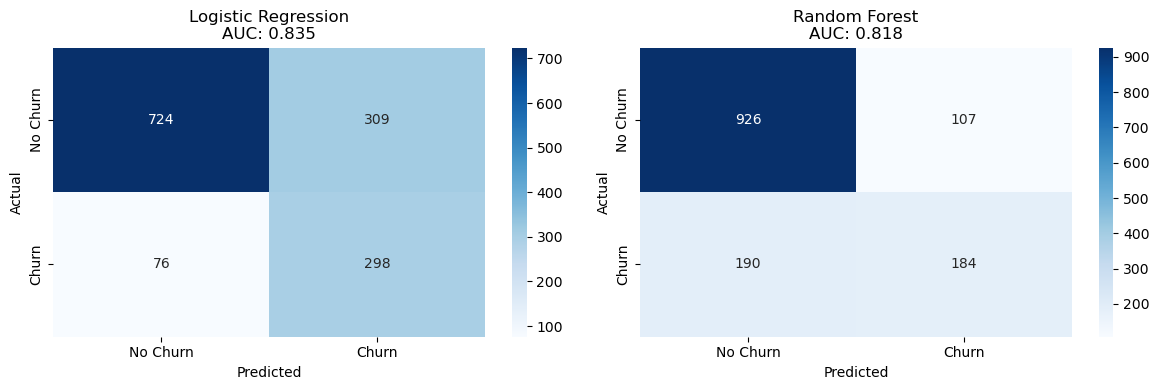

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

models = {
    'Logistic Regression': (lr_preds2, axes[0]),
    'Random Forest': (rf_preds, axes[1])
}

for name, (preds, ax) in models.items():
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'])
    ax.set_title(f'{name}\nAUC: {"0.835" if "Logistic" in name else "0.818"}')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')

plt.tight_layout()
plt.show()

Feature Importance (Random Forest)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8116\754442486.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='Blues_r')


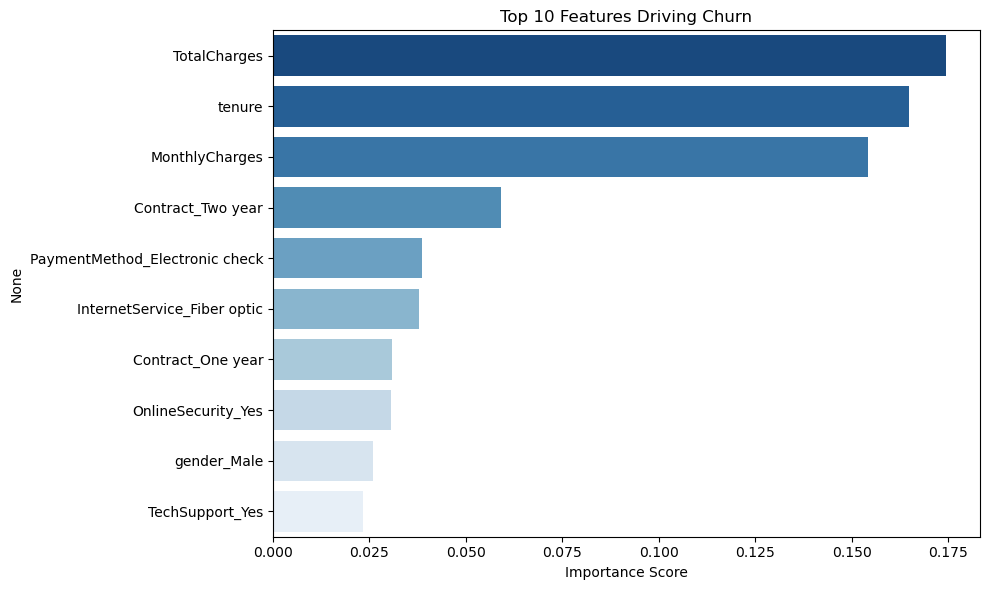

In [20]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette='Blues_r')
plt.title('Top 10 Features Driving Churn')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

Improve Random Forest with Hyperparameter Tuning

In [21]:

from sklearn.model_selection import GridSearchCV

# Define parameters to try
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

# GridSearch tries all combinations and finds the best
rf_tuned = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid,
    cv=5,
    scoring='recall',  # optimise for catching churners
    n_jobs=-1
)

rf_tuned.fit(X_train, y_train)
best_rf_preds = rf_tuned.best_estimator_.predict(X_test)

print("Best parameters found:", rf_tuned.best_params_)
print("\n=== Tuned Random Forest ===")
print(classification_report(y_test, best_rf_preds))
print("AUC Score:", round(roc_auc_score(y_test, rf_tuned.best_estimator_.predict_proba(X_test)[:,1]), 3))

Best parameters found: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}

=== Tuned Random Forest ===
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.50      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.74      1407

AUC Score: 0.836


Improve Logistic Regression with Hyperparameter Tuning


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

param_grid_lr = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__solver': ['lbfgs', 'liblinear']
}

lr_tuned_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

lr_grid = GridSearchCV(
    lr_tuned_pipeline,
    param_grid_lr,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

lr_grid.fit(X_train, y_train)
lr_tuned_preds = lr_grid.predict(X_test)

print("Best parameters found:", lr_grid.best_params_)
print("\n=== Tuned Logistic Regression ===")
print(classification_report(y_test, lr_tuned_preds))
print("AUC Score:", round(roc_auc_score(y_test, lr_grid.predict_proba(X_test)[:,1]), 3))

Best parameters found: {'model__C': 0.01, 'model__solver': 'liblinear'}

=== Tuned Logistic Regression ===
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407

AUC Score: 0.833


Final Model Comparison

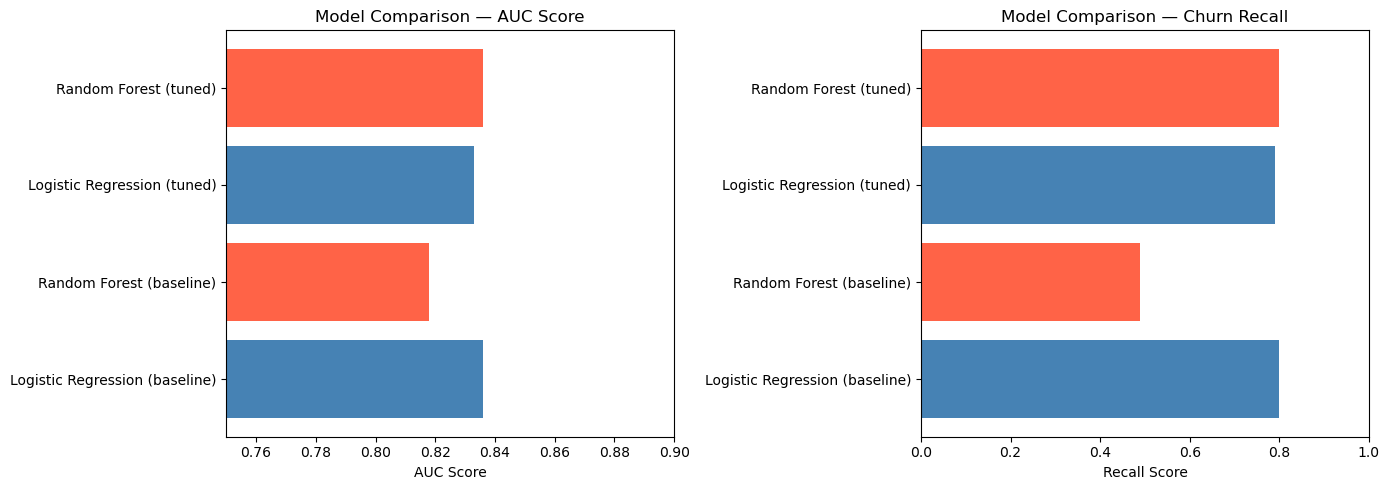


Final Recommendation:
Tuned Random Forest selected — AUC 0.836, 80% churn recall after hyperparameter tuning.
Baseline Random Forest improved from 49% to 80% recall through GridSearchCV optimisation.


In [23]:


results = {
    'Logistic Regression (baseline)': 0.836,
    'Random Forest (baseline)': 0.818,
    'Logistic Regression (tuned)': 0.833,
    'Random Forest (tuned)': 0.836
}

recall_results = {
    'Logistic Regression (baseline)': 0.80,
    'Random Forest (baseline)': 0.49,
    'Logistic Regression (tuned)': 0.79,
    'Random Forest (tuned)': 0.80
}

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# AUC comparison
axes[0].barh(list(results.keys()), list(results.values()), color=['steelblue', 'tomato', 'steelblue', 'tomato'])
axes[0].set_title('Model Comparison — AUC Score')
axes[0].set_xlim(0.75, 0.90)
axes[0].set_xlabel('AUC Score')

# Recall comparison
axes[1].barh(list(recall_results.keys()), list(recall_results.values()), color=['steelblue', 'tomato', 'steelblue', 'tomato'])
axes[1].set_title('Model Comparison — Churn Recall')
axes[1].set_xlim(0, 1)
axes[1].set_xlabel('Recall Score')

plt.tight_layout()
plt.show()

print("\nFinal Recommendation:")
print("Tuned Random Forest selected — AUC 0.836, 80% churn recall after hyperparameter tuning.")
print("Baseline Random Forest improved from 49% to 80% recall through GridSearchCV optimisation.")